___
## 0402
# Overview
___
# Time series(시계열)
- datatime, pd.to_datetime
- 날짜 표현식
- datatimeindex
- pandas.tseries.offsets
- resampler
- pandas의 time 객체와 index들
- Time zone과 period
- 시계열 데이터 시각화

In [34]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 8))

In [14]:
pd.date_range('1/1/2000', periods=4, freq='M', )

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30'], dtype='datetime64[ns]', freq='M')

#### 시계열을 위한 다양한 python 객체
- dt = datetime.strtime(str)
- str = datetime.strftime(format)
- 문자열을 datetime 객체로 변환 : dateutil.parser
- pd.to_datetime : Datetimeindex 생성

#### 날짜 표현식
- yyyy-mm-dd
- dd/mm/yyyy
- yyyy mm dd
- dd MonthString yyyy
- MonthString dd yyyy

#### Resampler
- ts.resample로 생성
    - time Series에 대해 groupby 같은 역할 수행
    - 월별 집계표, 연별 집계표를 만들고 싶을 때
    - 집계함수 (sum, mean, agg, apply, count 등) 사용 가능
- ts.resample.asfreq
    - 등간격의 새로운 time Series 생성
- groupby 연산

#### pd.date_range
- 기본 freq = 'D' 구간의 등간격 Datetimeindex 생성
- 'D' : Day

#### 변화율 구하기
- time lagging
- ts.shift
- percent change : 변환율
    - ts.shift

#### pandas.tseries.offsets를 이용한 연산
- 표현식 : datetiem + MonthEnd(2)
- MonthEnd().rollforward
- MonthEnd().rollback

#### timezone 관리
- timezone의 필요성
    - LMT(Local Mean time)
    - Summer time
- 동일 시간 datetime의 time zone 변경결과 
    - ts_utc = ts.tz_localize('UTC')
    - ts_utc.tz_convert('Us/Eastern')
- 서로 다른 time zone series 간 연산은 UTC로 처리한다.
- 나라별 시차를 고려해서 차이가 나는 시간만큼 표기해준다.

#### Period 관리
- datetime은 하나의 점 시간을 나타냄.
- period는 구간
- P = pd.Period('2007', freq = 'A-DEC' 시작은 1월1일 끝은 12월31일
    - p.asfreq
    - how = 'start'
    - how = 'end'
- freq = frequence?

#### timestamp와 Period 간 변환
- PeriodIndex
- DatetimeIndex
___

## Date and Time Data Types and Tools
- date : 연월일
- time : 시간
- datetime : date + time
- timedelta : 두 datetime값 간의 차이
- timestamp : UTC 1970년 1월 1일 자정을 기준으로 나노초 단위로 표현된 int값
- UTC : Universe Time ?

In [123]:
from datetime import datetime
# import datetime
now = datetime.now()
now

datetime.datetime(2019, 4, 2, 20, 51, 14, 788975)

In [124]:
type(now)

datetime.datetime

In [125]:
dir(now)[:5] # now가 가진 함수들을 보여줌

['__add__', '__class__', '__delattr__', '__dir__', '__doc__']

#### weekday 표기법
- mon = 0
- sun = 6

In [126]:
now.weekday() # 화요일

1

In [127]:
import time
ts_now = time.mktime(now.timetuple())
ts_now

1554205874.0

In [128]:
now.timetuple()

time.struct_time(tm_year=2019, tm_mon=4, tm_mday=2, tm_hour=20, tm_min=51, tm_sec=14, tm_wday=1, tm_yday=92, tm_isdst=-1)

In [129]:
ts_now/60/60/24//365

49.0

In [130]:
now.year - ts_now/60/60/24//365

1970.0

In [131]:
# month 구하기
ts_now/60/60/24%365//30 

3.0

In [132]:
# time sleep
now1 = datetime.now()
time.sleep(1)
now2 = datetime.now()

print(now2-now1)

0:00:01.000010


In [133]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [134]:
delta.days

926

In [135]:
delta.seconds

56700

- 12day를 더하거나 빼기

In [25]:
# 날짜 연산하기
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [26]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

___
### Converting between string and datetime
- strtime 함수를 이용해서 규칙을 전달해서 문자열로 바꿈.
- 연월일은 소문자

In [33]:
# datetime 객체 만들기
stamp = datetime(2011, 1, 3)

In [34]:
str(stamp)

'2011-01-03 00:00:00'

In [36]:
# strftime(stringfromtime) 함수 
stamp.strftime('%Y:%m:%d')

'2011:01:03'

- str로 표현된 날짜 형식을 파싱하여 datetime으로 변환하는 함수
- strptime()

In [37]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [38]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

- 매번 포맷하기 번거로우니 아래 함수를 사용함.

In [39]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [40]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [41]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [42]:
datestrs

['7/6/2011', '8/6/2011']

In [51]:
# datetime 객체로 변환하기
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [48]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [49]:
idx[2] # Not a Time

NaT

In [50]:
pd.isnull(idx)

array([False, False,  True])

#### csv 파일을 읽고 datetiem으로 파싱하고, index로 지정
- pd.read_csv(parsedate = True, index = col[0])

- 영국과 미국의 날짜 표기 방법은 다르다.
- 미국 : 월/일/년, 영국 : 일/월/년
- dayfirst = True를 설정하는건 데이터가 어디꺼인지 확인하고 설정

## Time Series Basics
- datetime 객체가 존재하는 Series

In [52]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.515577
2011-01-05    0.154917
2011-01-07    0.617019
2011-01-08   -1.710845
2011-01-10    1.234513
2011-01-12   -1.386734
dtype: float64

In [71]:
ts[::2] # 2칸씩 뛰고 색인

2011-01-02    0.515577
2011-01-07    0.617019
2011-01-10    1.234513
dtype: float64

In [53]:
type(ts)
# note: output changed to "pandas.core.series.Series"

pandas.core.series.Series

In [54]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

- 아래와 같은 산술연산에 대해 같은 index를 갖는 성분들끼리 연산이 이루어진다.

In [73]:
ts + ts[::2]

2011-01-02    1.031154
2011-01-05         NaN
2011-01-07    1.234039
2011-01-08         NaN
2011-01-10    2.469025
2011-01-12         NaN
dtype: float64

- NaN값이 생성하는 걸 방지하고 싶다면 ts.add

In [74]:
# ts.add(ts[::2],fill_na)

NameError: name 'fill_na' is not defined

In [75]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

- 하나의 값 == timestamp

In [76]:
stamp = ts.index[0]
stamp
# note: output changed from <Timestamp: 2011-01-02 00:00:00> to Timestamp('2011-01-02 00:00:00')

Timestamp('2011-01-02 00:00:00')

### Indexing, selection, subsetting
- datetime 객체 또한 index label에 기반한 선택 및 색인이 가능하다.

In [77]:
ts

2011-01-02    0.515577
2011-01-05    0.154917
2011-01-07    0.617019
2011-01-08   -1.710845
2011-01-10    1.234513
2011-01-12   -1.386734
dtype: float64

In [80]:
stamp = ts.index[2]
ts[stamp]

0.6170193797522174

In [79]:
ts.iloc[2] # iloc도 가능.

0.6170193797522174

In [59]:
ts['1/10/2011']

1.2345126921259582

In [60]:
ts['20110110']

1.2345126921259582

- 긴 시계열 데이터에서 년도나 월만 지정하여 subset을 취할 수 있다
- pd.date_range(freq = 'D')

In [61]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -2.083992
2000-01-02   -0.305767
2000-01-03   -0.357065
2000-01-04    0.275501
2000-01-05    0.345833
2000-01-06   -1.112819
                ...   
2002-09-21   -0.680812
2002-09-22    0.886846
2002-09-23   -0.133849
2002-09-24    1.343032
2002-09-25    0.167328
2002-09-26   -1.099494
Freq: D, Length: 1000, dtype: float64

In [81]:
longer_ts['2001']

2001-01-01   -0.786836
2001-01-02   -1.666316
2001-01-03   -0.566045
2001-01-04   -0.399064
2001-01-05    0.910401
2001-01-06   -2.402697
                ...   
2001-12-26    0.641531
2001-12-27    0.279555
2001-12-28   -0.369865
2001-12-29   -0.523486
2001-12-30    0.087255
2001-12-31    0.188213
Freq: D, Length: 365, dtype: float64

In [63]:
longer_ts['2001-05']

2001-05-01    1.594539
2001-05-02   -0.135329
2001-05-03   -0.504410
2001-05-04    0.315252
2001-05-05    0.276593
2001-05-06    0.161757
                ...   
2001-05-26   -0.427720
2001-05-27   -0.827787
2001-05-28   -1.450397
2001-05-29   -0.774439
2001-05-30   -0.615390
2001-05-31    0.473394
Freq: D, Length: 31, dtype: float64

In [85]:
ts['2011, 1, 7':] # 점색인뿐만아니라 슬라이싱도 됩니당.

2011-01-07    0.617019
2011-01-08   -1.710845
2011-01-10    1.234513
2011-01-12   -1.386734
dtype: float64

In [83]:
# 2011, 1, 7을 datetime으로 만들고 슬라이싱
ts[datetime(2011, 1, 7):]

2011-01-07    0.617019
2011-01-08   -1.710845
2011-01-10    1.234513
2011-01-12   -1.386734
dtype: float64

In [65]:
ts

2011-01-02    0.515577
2011-01-05    0.154917
2011-01-07    0.617019
2011-01-08   -1.710845
2011-01-10    1.234513
2011-01-12   -1.386734
dtype: float64

In [66]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.617019
2011-01-08   -1.710845
2011-01-10    1.234513
dtype: float64

- truncate는 시계열을 자르기 위해 사용함.

In [86]:
ts.truncate(after='1/9/2011')

2011-01-02    0.515577
2011-01-05    0.154917
2011-01-07    0.617019
2011-01-08   -1.710845
dtype: float64

In [87]:
dates = pd.date_range('1/1/2000', perio
                      ds=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.213175,-1.176014,0.122478,0.669369
2001-05-09,-0.406000,-0.055236,-0.471283,0.126805
2001-05-16,-0.320877,0.585277,-0.260721,1.847203
2001-05-23,-0.530094,-0.266023,0.153358,0.965629
2001-05-30,0.101756,0.192444,0.621104,0.739956


In [90]:
long_df.loc['May/2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.213175,-1.176014,0.122478,0.669369
2001-05-09,-0.406000,-0.055236,-0.471283,0.126805
2001-05-16,-0.320877,0.585277,-0.260721,1.847203
2001-05-23,-0.530094,-0.266023,0.153358,0.965629
2001-05-30,0.101756,0.192444,0.621104,0.739956


In [92]:
long_df.loc['5, 2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.213175,-1.176014,0.122478,0.669369
2001-05-09,-0.406000,-0.055236,-0.471283,0.126805
2001-05-16,-0.320877,0.585277,-0.260721,1.847203
2001-05-23,-0.530094,-0.266023,0.153358,0.965629
2001-05-30,0.101756,0.192444,0.621104,0.739956


- time series 또한 copy(), reference가 구분된다.
- 정렬되지 않은 ts에 대한 truncate 함수는 에러를 발생시킨다.

In [88]:
# 모든 연도의 5월을 뽑고 싶다면?
longer_ts[longer_ts.index.month == 5]

2000-05-01   -0.821902
2000-05-02   -2.112201
2000-05-03   -1.199540
2000-05-04    1.613052
2000-05-05   -0.675365
2000-05-06   -0.945321
                ...   
2002-05-26   -0.701661
2002-05-27   -0.401438
2002-05-28   -0.738981
2002-05-29   -0.193885
2002-05-30    0.243958
2002-05-31   -0.155337
Length: 93, dtype: float64

### Time series with duplicate indices

In [93]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [94]:
dup_ts.index.is_unique

False

In [95]:
dup_ts['1/3/2000']  # not duplicated

4

In [96]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

- grouping

In [97]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [99]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges, Frequencies, and Shifting
- pandas에서 시계열은 불규칙한 것으로 본다.

In [100]:
ts

2011-01-02    0.515577
2011-01-05    0.154917
2011-01-07    0.617019
2011-01-08   -1.710845
2011-01-10    1.234513
2011-01-12   -1.386734
dtype: float64

In [136]:
# 빈도를 표시해주는 함수
ts2 = ts.resample('D')
ts2

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

- resample을 하게 되면 resampler라는 groupby series 객체가 만들어짐.
- 따라서 병합연산이 가능해진다.

### Generating date ranges
- both start and end point
- freq default = 'D'

In [108]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [109]:
# start point부터 연속된 20일 생성
pd.date_range(start='4/1/2012', periods=20) 

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [110]:
# end point까지 연속된 20일 생성
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [112]:
# Business Day는 일하는 날만 !
from pandas.tseries.offsets import Day, MonthEnd
pd.date_range(end = '6/1/2012', periods=20, freq = 'B')

DatetimeIndex(['2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='B')

In [114]:
# 월 영업 마감일 : BM(Business Month)
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [115]:
# 날짜 + 시간일 때, 시간은 유지하고 날짜만 추가
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [119]:
# 주중 마지막 체크?
pd.date_range('5/2/2012 12:56:31', periods=5, freq='W')

DatetimeIndex(['2012-05-06 12:56:31', '2012-05-13 12:56:31',
               '2012-05-20 12:56:31', '2012-05-27 12:56:31',
               '2012-06-03 12:56:31'],
              dtype='datetime64[ns]', freq='W-SUN')

In [120]:
# time 제거 
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [121]:
# 시간 단위로 만들기
pd.date_range('5/2/2012 12:56:31', periods=5, freq = 'H', normalize=True)

DatetimeIndex(['2012-05-02 00:00:00', '2012-05-02 01:00:00',
               '2012-05-02 02:00:00', '2012-05-02 03:00:00',
               '2012-05-02 04:00:00'],
              dtype='datetime64[ns]', freq='H')

### Frequencies and Date Offsets
- offset : ?

In [130]:
# offsets dir
pd.offsets.__all__[:5]

['Day', 'BusinessDay', 'BDay', 'CustomBusinessDay', 'CDay']

In [122]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [123]:
# 4시간
four_hours = Hour(4)
four_hours

<4 * Hours>

In [131]:
# 4시간의 offset 객체
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

- four_hours 객체를 만들어도 되지만 4h를 사용하는 것이 일반적이다.

In [132]:
Hour(2) + Minute(30)

<150 * Minutes>

In [126]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [133]:
pd.date_range('1/1/2000', periods=10, freq='1h30T') # min == T

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates
- 월별 n주차 x요일

In [134]:
# 월별 3번째 금요일
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI') 
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

- 주식시장 옵션 만기일을 설정하거나 할 때 사용.

### Shifting (leading and lagging) data
- shift는 date를 시간축에서 앞으로 혹은 뒤로 이동시키는 함수.

In [138]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.619126
2000-02-29    0.392811
2000-03-31    1.085770
2000-04-30    1.859362
Freq: M, dtype: float64

In [141]:
# 현재의 값이 미래로 넘어감
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.619126
2000-04-30    0.392811
Freq: M, dtype: float64

In [142]:
# 미래의 값이 현재로 들어옴
ts.shift(-2)

2000-01-31    1.085770
2000-02-29    1.859362
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

- 변화율을 계산하면

In [143]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.365540
2000-03-31    1.764104
2000-04-30    0.712483
Freq: M, dtype: float64

- freq(빈도)를 지정하면 datetimeindex가 확장되면서 데이터의 유실을 방지한다.

In [144]:
ts.shift(2, freq='M') # 새로운 label인 5,6월을 만듦.

2000-03-31    0.619126
2000-04-30    0.392811
2000-05-31    1.085770
2000-06-30    1.859362
Freq: M, dtype: float64

In [145]:
ts.shift(3, freq='D') # 1월31일 -> 2월3일

2000-02-03    0.619126
2000-03-03    0.392811
2000-04-03    1.085770
2000-05-03    1.859362
dtype: float64

In [146]:
ts.shift(1, freq='3D') # 위와 동일

2000-02-03    0.619126
2000-03-03    0.392811
2000-04-03    1.085770
2000-05-03    1.859362
dtype: float64

In [148]:
ts.shift(1, freq='90T') 

2000-01-31 01:30:00    0.619126
2000-02-29 01:30:00    0.392811
2000-03-31 01:30:00    1.085770
2000-04-30 01:30:00    1.859362
Freq: M, dtype: float64

#### Shifting dates with offsets
- 다양한 offset을 통해 datetime이나 timestamp를 조정할 수 있음.

In [136]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [137]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [138]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

- offset에 rollforward, bakc 적용 가능.

In [139]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [140]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [155]:
now - MonthEnd()

Timestamp('2011-10-31 00:00:00')

- offset을 groupby 함수와 함께 사용

In [161]:
ts = Series(np.random.randn(200),
            index=pd.date_range('1/15/2000', periods=200, freq='4d'))
ts

2000-01-15    0.600614
2000-01-19   -0.903114
2000-01-23    0.314503
2000-01-27   -0.341283
2000-01-31   -1.982393
2000-02-04   -0.613674
                ...   
2002-03-01    0.198526
2002-03-05    1.588178
2002-03-09   -1.004555
2002-03-13    1.179271
2002-03-17    2.076198
2002-03-21    0.153830
Freq: 4D, Length: 200, dtype: float64

In [164]:
ts.groupby(offset.rollforward).mean() # 월 별 마지막날로 grouping

2000-01-31   -0.462335
2000-02-29   -0.638400
2000-03-31    0.173842
2000-04-30    0.630407
2000-05-31    0.106995
2000-06-30    0.730347
                ...   
2001-10-31   -0.269869
2001-11-30    0.052065
2001-12-31   -0.187501
2002-01-31   -0.212041
2002-02-28   -0.024381
2002-03-31    0.698575
Length: 27, dtype: float64

In [163]:
ts.groupby([ts.index.year, ts.index.month]).mean()  # 위와 동일한 결과

2000  1    -0.462335
      2    -0.638400
      3     0.173842
      4     0.630407
      5     0.106995
      6     0.730347
              ...   
2001  10   -0.269869
      11    0.052065
      12   -0.187501
2002  1    -0.212041
      2    -0.024381
      3     0.698575
Length: 27, dtype: float64

- 매 년/월 별로 grouping 된다.

In [165]:
ts.resample('M').mean() # 매 월 grouping, 위와 전부 동일한 결과

2000-01-31   -0.462335
2000-02-29   -0.638400
2000-03-31    0.173842
2000-04-30    0.630407
2000-05-31    0.106995
2000-06-30    0.730347
                ...   
2001-10-31   -0.269869
2001-11-30    0.052065
2001-12-31   -0.187501
2002-01-31   -0.212041
2002-02-28   -0.024381
2002-03-31    0.698575
Freq: M, Length: 27, dtype: float64

- OHLC : 결측치를 제외한 각 그룹의 min max close값(월의 마지막 날)
- ts.resample == df.groupby
- resampler == DataFrame Groupby

## Time Zone Handling
- 나라 별 시간이 다르기 때문에 이를 고려함.
- summer time을 고려함.
- 전 세계 시간 정보를 모아둔 olson db를 담고 있는 pytz모듈에서 가져온다.

In [3]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [5]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

- LMT 지방표준시(서울)보다 1일 늦은 시간 정보를 표기.
- UTC : 그리니치 천문대를 기준으로한 시간.

### Localization and Conversion
- 기본적으로 pandas에서 time zone은 엄격히 다루지 않음.
- 현 지역의 시간을 다른 지역으로 converting

In [6]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [7]:
print(ts.index.tz) #time zone 정보는 없음.

None


In [11]:
datetime.now()

datetime.datetime(2019, 4, 2, 16, 11, 40, 410502)

In [8]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

- UTC 기준 시간 차이가 없다 == +00

#### Localizing

In [151]:
ts_utc = ts.tz_localize('Asia/Seoul')
ts_utc

2000-01-01 00:00:00+09:00     0
2000-01-01 00:01:00+09:00     1
2000-01-01 00:02:00+09:00     2
2000-01-01 00:03:00+09:00     3
2000-01-01 00:04:00+09:00     4
2000-01-01 00:05:00+09:00     5
2000-01-01 00:06:00+09:00     6
2000-01-01 00:07:00+09:00     7
2000-01-01 00:08:00+09:00     8
2000-01-01 00:09:00+09:00     9
2000-01-01 00:10:00+09:00    10
2000-01-01 00:11:00+09:00    11
Freq: T, dtype: int32

In [152]:
ts_utc.tz_localize('US/Eastern')

TypeError: Already tz-aware, use tz_convert to convert.

In [149]:
ts_utc.index

DatetimeIndex(['2000-01-01 00:00:00+00:00', '2000-01-01 00:01:00+00:00',
               '2000-01-01 00:02:00+00:00', '2000-01-01 00:03:00+00:00',
               '2000-01-01 00:04:00+00:00', '2000-01-01 00:05:00+00:00',
               '2000-01-01 00:06:00+00:00', '2000-01-01 00:07:00+00:00',
               '2000-01-01 00:08:00+00:00', '2000-01-01 00:09:00+00:00',
               '2000-01-01 00:10:00+00:00', '2000-01-01 00:11:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='T')

#### Converting

In [153]:
ts_utc.tz_convert('US/Eastern')

1999-12-31 10:00:00-05:00     0
1999-12-31 10:01:00-05:00     1
1999-12-31 10:02:00-05:00     2
1999-12-31 10:03:00-05:00     3
1999-12-31 10:04:00-05:00     4
1999-12-31 10:05:00-05:00     5
1999-12-31 10:06:00-05:00     6
1999-12-31 10:07:00-05:00     7
1999-12-31 10:08:00-05:00     8
1999-12-31 10:09:00-05:00     9
1999-12-31 10:10:00-05:00    10
1999-12-31 10:11:00-05:00    11
Freq: T, dtype: int32

- 미 동부에서 3월 11일 이후 일광시간대가 적용됨.
- summer time이 적용 되었기 때문에 1시간이 빨라졌음.

___

In [17]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern

2012-03-09 09:30:00-05:00    1.585171
2012-03-10 09:30:00-05:00    0.573543
2012-03-11 09:30:00-04:00   -0.060313
2012-03-12 09:30:00-04:00   -1.552292
2012-03-13 09:30:00-04:00    0.006518
2012-03-14 09:30:00-04:00    0.120398
Freq: D, dtype: float64

In [18]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    1.585171
2012-03-10 14:30:00+00:00    0.573543
2012-03-11 13:30:00+00:00   -0.060313
2012-03-12 13:30:00+00:00   -1.552292
2012-03-13 13:30:00+00:00    0.006518
2012-03-14 13:30:00+00:00    0.120398
Freq: D, dtype: float64

In [19]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    1.585171
2012-03-10 15:30:00+01:00    0.573543
2012-03-11 14:30:00+01:00   -0.060313
2012-03-12 14:30:00+01:00   -1.552292
2012-03-13 14:30:00+01:00    0.006518
2012-03-14 14:30:00+01:00    0.120398
Freq: D, dtype: float64

- time zone을 적용하는 방법에 따라 시간은 전부 다를 수 있음.
___

In [20]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [21]:
ts.index.tz_localize('Asia/Seoul')

DatetimeIndex(['2012-03-09 09:30:00+09:00', '2012-03-10 09:30:00+09:00',
               '2012-03-11 09:30:00+09:00', '2012-03-12 09:30:00+09:00',
               '2012-03-13 09:30:00+09:00', '2012-03-14 09:30:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='D')

### Operations with time zone-aware Timestamp objects
- timestamp 객체에도 time zone을 적용할 수 있음.

In [23]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc') # 'utc'로 localize
stamp_utc.tz_convert('US/Eastern') # 'us/eastern'으로 convert

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [24]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

- timestamp 객체를 만들 때, 직접 tz속성을 넣어 줄 수 있다.

In [26]:
stamp_utc.value

1299902400000000000

In [27]:
stamp_utc.tz_convert('US/Eastern').value # 절대 시간인 'utc'를 기준으로한 값은 변하지 않는다.

1299902400000000000

In [28]:
# 일광절약시간 (Day lighting Saving Time) 전환 30분 전 
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [29]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [31]:
# 일광절약시간 90분 전 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [32]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

- timestamp의 value는 변하지 않았지만, datetime 표기값이 다르다.

### Operations between different time zones
- 서로 다른 시간 대의 두 시계열을 합하면, UTC time zone으로 변경된다.

In [33]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -1.622061
2012-03-08 09:30:00    0.095202
2012-03-09 09:30:00   -1.401260
2012-03-12 09:30:00   -1.347443
2012-03-13 09:30:00   -2.090274
2012-03-14 09:30:00    0.711634
2012-03-15 09:30:00   -2.246586
2012-03-16 09:30:00   -0.909638
2012-03-19 09:30:00    0.602992
2012-03-20 09:30:00   -1.685089
Freq: B, dtype: float64

In [35]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -1.622061
2012-03-08 09:30:00+00:00    0.095202
2012-03-09 09:30:00+00:00   -1.401260
2012-03-12 09:30:00+00:00   -1.347443
2012-03-13 09:30:00+00:00   -2.090274
2012-03-14 09:30:00+00:00    0.711634
2012-03-15 09:30:00+00:00   -2.246586
Freq: B, dtype: float64

In [36]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00   -1.401260
2012-03-12 13:30:00+04:00   -1.347443
2012-03-13 13:30:00+04:00   -2.090274
2012-03-14 13:30:00+04:00    0.711634
2012-03-15 13:30:00+04:00   -2.246586
Freq: B, dtype: float64

In [37]:
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [38]:
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -2.802521
2012-03-12 09:30:00+00:00   -2.694885
2012-03-13 09:30:00+00:00   -4.180548
2012-03-14 09:30:00+00:00    1.423269
2012-03-15 09:30:00+00:00   -4.493173
Freq: B, dtype: float64

## Periods and Period Arithmetic
- 주기를 가지면 grouping한 효과를 가짐.
- 몇 일, 몇 개월, 몇 해 같은 기간은 Period 클래스로 표현 가능.

In [39]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

- p 객체는 2007.1.1 ~ 2007.12.31의 기간을 나타냄

In [41]:
p + 5

Period('2012', 'A-DEC')

In [42]:
p - 2

Period('2005', 'A-DEC')

두 period가 동일한 freq를 가진다면, 두 기간의 차는 기간간의 간격이 된다.

In [46]:
pd.Period('2014', freq='A-DEC') - p # freq = 'A-OCT'일 경우 에러 발생.

<7 * YearEnds: month=12>

- period_range 함수로 생성하며, 순차적인 기간을 갖는다
    - pandas의 axis index와 동일하게 사용된다.

In [47]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [48]:
# 아래 결과는 해당 월의 누적합, summary 등으로 봐야 한다.
Series(np.random.randn(6), index=rng)

2000-01    1.208267
2000-02    0.886820
2000-03   -0.198423
2000-04   -0.635049
2000-05   -0.668560
2000-06    1.181317
Freq: M, dtype: float64

In [49]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC') # 4분기를 나타냄.
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [50]:
index[1].to_timestamp()

Timestamp('2002-04-01 00:00:00')

In [51]:
index[2] - index[1]

<3 * QuarterEnds: startingMonth=12>

- 순서가 바뀐 index도 생성가능하며, sort_values()를 통해 정렬 가능.

### Period Frequency Conversion
- asfreq 함수를 이용해 다른 빈도로 변환할 수 있다.
- 새해 첫날부터 시작하는 연간 빈도를 월간 빈도로 바꿔보자.

In [55]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [56]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [57]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

- p의 freq을 다르게 할 경우, asfreq의 변환 결과는 다르게 나타난다.

In [156]:
p = pd.Period('2007', freq='A-JUN')
p.end_time

Timestamp('2007-06-30 23:59:59.999999999')

In [58]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [59]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

- freq가 더 긴 빈도일 경우, 원래의 기간이 변환될 기간의 어디에 속하느냐에 따라 변환될 period가 결정됨.

In [61]:
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [60]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

- 위의 예시 과정
    - p의 기간은 2007/8/1~2007/8/31
    - .asfreq('A-JUN')의 기간은 X/7/1~ X+1/6/30 이므로
    - p는 2007/7/1 ~ 2008/6/30에 속하므로
    - p.asfreq('A-JUN')은 period('2008', 'A-JUN')이 됨.

In [62]:
p.asfreq('A-JUN', how = 'start') # 위와 동일함.

Period('2008', 'A-JUN')

In [63]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.068828
2007   -1.597543
2008   -1.087416
2009    0.215997
Freq: A-DEC, dtype: float64

In [64]:
ts.asfreq('M')

2006-12   -0.068828
2007-12   -1.597543
2008-12   -1.087416
2009-12    0.215997
Freq: M, dtype: float64

In [65]:
ts.asfreq('M', how='start')

2006-01   -0.068828
2007-01   -1.597543
2008-01   -1.087416
2009-01    0.215997
Freq: M, dtype: float64

In [66]:
ts.asfreq('B', how='end')

2006-12-29   -0.068828
2007-12-31   -1.597543
2008-12-31   -1.087416
2009-12-31    0.215997
Freq: B, dtype: float64

In [67]:
ts.asfreq('M', how = 'start', fill_value=0) # method -> fill_value

2006-01   -0.068828
2007-01   -1.597543
2008-01   -1.087416
2009-01    0.215997
Freq: M, dtype: float64

### Quarterly period frequencies
- 분기 빈도는 재정, 금융 등 여러 분야에서 사용되고 있다. pandas에서는 12가지의 빈도를 지원함.
- M
- Q-DEC 123, 456, 789, 101112 기존에 주로 쓰는 분기 빈도
- Q-SEP 1월이 올해 2분기로 시작
- Q-FEB 올해 3월이 내년 1분기 시작

In [68]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [69]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [70]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

요정도는 알자
___

In [71]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

- 띠용... 더 생각하고, 봐보세요

In [72]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [ ]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

In [ ]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

### Converting Timestamps to Periods (and back)
- 흑

In [78]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    0.026067
2000-02-29    0.984191
2000-03-31    0.822956
Freq: M, dtype: float64

In [79]:
pts

2000-01    0.026067
2000-02    0.984191
2000-03    0.822956
Freq: M, dtype: float64

- ^_^

In [86]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2

2000-01-29    1.351809
2000-01-30   -0.418412
2000-01-31   -0.100653
2000-02-01    1.541824
2000-02-02   -1.443806
2000-02-03    0.556891
Freq: D, dtype: float64

In [87]:
ts2.to_period('M') # grouping이 되는 모습

2000-01    1.351809
2000-01   -0.418412
2000-01   -0.100653
2000-02    1.541824
2000-02   -1.443806
2000-02    0.556891
Freq: M, dtype: float64

In [88]:
pts = ts.to_period()
pts

2000-01    0.026067
2000-02    0.984191
2000-03    0.822956
Freq: M, dtype: float64

In [89]:
pts.to_timestamp(how='end')

2000-01-31 23:59:59.999999999    0.026067
2000-02-29 23:59:59.999999999    0.984191
2000-03-31 23:59:59.999999999    0.822956
Freq: M, dtype: float64

In [90]:
pts.to_timestamp(how='end').index

DatetimeIndex(['2000-01-31 23:59:59.999999999',
               '2000-02-29 23:59:59.999999999',
               '2000-03-31 23:59:59.999999999'],
              dtype='datetime64[ns]', freq='M')

### Creating a PeriodIndex from arrays
- 고정된 빈도를 갖는 데이터는 종종 여러 column에 따라 datetime으로 만듦.

In [91]:
data = pd.read_csv('../ch08/macrodata.csv')
data.year

FileNotFoundError: [Errno 2] File b'../ch08/macrodata.csv' does not exist: b'../ch08/macrodata.csv'

In [ ]:
data.quarter

In [ ]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

In [ ]:
data.index = index
data.iloc[:,2:].head()

## Resampling and Frequency Conversion
- resampling을 통한 빈도 변환
- 현재 데이터의 빈도보다 상위 빈도로 바꾸는 것 == upsampling : 더 짧은 freq이므로 보간이 필요.
- 반대 == downsampling : 더 긴 freq로 압축하므로 집계가 필요.

In [32]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts

2000-01-01   -0.947335
2000-01-02   -0.192478
2000-01-03   -1.564371
2000-01-04   -0.810615
2000-01-05   -0.484898
2000-01-06    1.111052
                ...   
2000-04-04   -0.122846
2000-04-05    1.093677
2000-04-06    0.112707
2000-04-07   -1.070634
2000-04-08   -0.176181
2000-04-09   -0.686076
Freq: D, Length: 100, dtype: float64

In [33]:
ts.resample('M') # DataFrame groupby 객체처럼 취급하면 된다.

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [34]:
ts.resample('M').mean() # grouping

2000-01-31   -0.002266
2000-02-29    0.099759
2000-03-31   -0.191068
2000-04-30    0.284890
Freq: M, dtype: float64

In [35]:
ts.resample('M', kind='period').mean()

2000-01   -0.002266
2000-02    0.099759
2000-03   -0.191068
2000-04    0.284890
Freq: M, dtype: float64

In [37]:
ts.resample('D').ffill(limit = 10) 
# ffill() == fill_method <- deplicated
# limit : ?

2000-01-01   -0.947335
2000-01-02   -0.192478
2000-01-03   -1.564371
2000-01-04   -0.810615
2000-01-05   -0.484898
2000-01-06    1.111052
                ...   
2000-04-04   -0.122846
2000-04-05    1.093677
2000-04-06    0.112707
2000-04-07   -1.070634
2000-04-08   -0.176181
2000-04-09   -0.686076
Freq: D, Length: 100, dtype: float64

___
# 0403
## Overview
- window
    - groupby + agg 한 결과물이 각 value에 찍힌다.
    - 추세를 판단하기 위한 함수
    - window : resampler와 유사한 groupby 객체, min_point 옵션으로 최소 성분 수 설정.
    - window 객체를 생성하는 rolling, emw 함수
    - rolling : 기간(고정된 시간, 간격, freq 객체), moving window 객체를 만듦. 모든 성분들의 가중치가 균등.
    - ewm(exponentially weighted moving) : rolling과 동일하지만 약간의 차이가 있다. 가중치(weight)를 줄 때, 과거는 적게, 현재는 크게 가중치를 줌.

### Downsampling
- 짧은 freq 데이터를 더 긴 freq로 집계하는 것.
- convention ? 

In [38]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [42]:
ts.resample('5min').sum()
# 5분 단위 집계, 총합

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

- 5분 단위로 집계
    - 0분은 포함, 5분은 제외됨. [0,5), label : 0

In [43]:
ts.resample('5min', closed= 'right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

- closed = 'right', (0,5], label : 0
- label과 closed가 다르면 원하지 않은 결과가 나옴.

In [46]:
ts.resample('5min', closed= 'right', label= 'right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [47]:
ts.resample('5min', loffset='-1s', label= 'right').sum()

2000-01-01 00:04:59    10
2000-01-01 00:09:59    35
2000-01-01 00:14:59    21
Freq: 5T, dtype: int32

- labeloffset : -1s

####  close and label
- close = right, left 고려해서 edge point의 어디를 포함할지 정해줄 수 있다.

#### Open-High-Low-Close (OHLC) resampling
- 금융분야에서 유동자산의 시계열 데이터를 집계하는 일반적인 방식.
- 구간 안에 시작값, 최댓값, 최솟값, 끝 값을 찾음.

In [48]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [51]:
ts.resample('5min', how='ohlc')
# note: output changed because of changed defaults

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy
- down sampling 방식으로 groupby 함수를 사용할 수 있다.
- 월 주에 대한 데이터 찾기 가능

In [3]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts[:5]

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
Freq: D, dtype: int32

In [4]:
ts.groupby(lambda x: x.month).mean() # groupby 함수는 항상 index에 적용된다.

1    15
2    45
3    75
4    95
dtype: int32

In [5]:
ts.groupby(ts.index.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [6]:
ts.resample('M').mean()

2000-01-31    15
2000-02-29    45
2000-03-31    75
2000-04-30    95
Freq: M, dtype: int32

In [7]:
ts.index.map(lambda x: x.month)

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64')

In [8]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling and interpolation

In [9]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.520049,-0.267723,-2.612653,0.116638
2000-01-12,1.464228,0.786098,0.446823,0.887672


In [10]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [11]:
frame.resample('D', fill_method='ffill')

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,-0.520049,-0.267723,-2.612653,0.116638
2000-01-06,-0.520049,-0.267723,-2.612653,0.116638
2000-01-07,-0.520049,-0.267723,-2.612653,0.116638
2000-01-08,-0.520049,-0.267723,-2.612653,0.116638
2000-01-09,-0.520049,-0.267723,-2.612653,0.116638
2000-01-10,-0.520049,-0.267723,-2.612653,0.116638
2000-01-11,-0.520049,-0.267723,-2.612653,0.116638
2000-01-12,1.464228,0.786098,0.446823,0.887672


In [12]:
frame.resample('D', fill_method='ffill', limit=2)

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=2)
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,-0.520049,-0.267723,-2.612653,0.116638
2000-01-06,-0.520049,-0.267723,-2.612653,0.116638
2000-01-07,-0.520049,-0.267723,-2.612653,0.116638
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.464228,0.786098,0.446823,0.887672


In [13]:
frame.resample('W-THU', fill_method='ffill')

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-06,-0.520049,-0.267723,-2.612653,0.116638
2000-01-13,1.464228,0.786098,0.446823,0.887672


### Resampling with periods

In [14]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.070123,-1.043497,-0.121035,-0.832832
2000-02,-0.233061,-0.586546,0.870343,0.606083
2000-03,0.867699,-0.082365,0.015235,-2.778048
2000-04,1.849769,-1.460557,-1.101895,1.351263
2000-05,1.195923,0.272810,0.049190,-1.310758


- down sampling 해보자.

In [17]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.303385,-0.376429,-0.265368,0.040080
2001,0.001727,0.183165,-0.152886,0.323831


In [21]:
i = frame.index

In [23]:
frame.groupby(i.year).mean()

,Colorado,Texas,New York,Ohio
2000,0.303385,-0.376429,-0.265368,0.040080
2001,0.001727,0.183165,-0.152886,0.323831


- down sampling 결과를 다시 up sampling하면

In [24]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC', fill_method='ffill')
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000Q1,0.303385,-0.376429,-0.265368,0.040080
2000Q2,0.303385,-0.376429,-0.265368,0.040080
2000Q3,0.303385,-0.376429,-0.265368,0.040080
2000Q4,0.303385,-0.376429,-0.265368,0.040080
2001Q1,0.001727,0.183165,-0.152886,0.323831
2001Q2,0.001727,0.183165,-0.152886,0.323831
2001Q3,0.001727,0.183165,-0.152886,0.323831
2001Q4,0.001727,0.183165,-0.152886,0.323831


In [25]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q1,0.303385,-0.376429,-0.265368,0.040080
2000Q2,0.303385,-0.376429,-0.265368,0.040080
2000Q3,0.303385,-0.376429,-0.265368,0.040080
2000Q4,0.303385,-0.376429,-0.265368,0.040080
2001Q1,0.001727,0.183165,-0.152886,0.323831
2001Q2,0.001727,0.183165,-0.152886,0.323831
2001Q3,0.001727,0.183165,-0.152886,0.323831
2001Q4,0.001727,0.183165,-0.152886,0.323831


In [29]:
annual_frame.resample('Q-MAR', fill_method='ffill')

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q4,0.303385,-0.376429,-0.265368,0.040080
2001Q1,0.303385,-0.376429,-0.265368,0.040080
2001Q2,0.303385,-0.376429,-0.265368,0.040080
2001Q3,0.303385,-0.376429,-0.265368,0.040080
2001Q4,0.001727,0.183165,-0.152886,0.323831
2002Q1,0.001727,0.183165,-0.152886,0.323831
2002Q2,0.001727,0.183165,-0.152886,0.323831
2002Q3,0.001727,0.183165,-0.152886,0.323831


- 'Q-MAR'가 4Q가 됨. convention default : 'start'
- 2000/1/1 ~ 2000/3/31 -? 2000Q4

In [30]:
annual_frame.resample('Q-MAR', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2001Q3,0.303385,-0.376429,-0.265368,0.040080
2001Q4,0.303385,-0.376429,-0.265368,0.040080
2002Q1,0.303385,-0.376429,-0.265368,0.040080
2002Q2,0.303385,-0.376429,-0.265368,0.040080
2002Q3,0.001727,0.183165,-0.152886,0.323831


- convention : 'start', 'end' 어떻게 적용되는건지? 0_0?

## Time series plotting
- Ts 그림그리기

In [32]:
close_px_all = pd.read_csv('C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  This is separate from the ipykernel package so we can avoid doing imports until


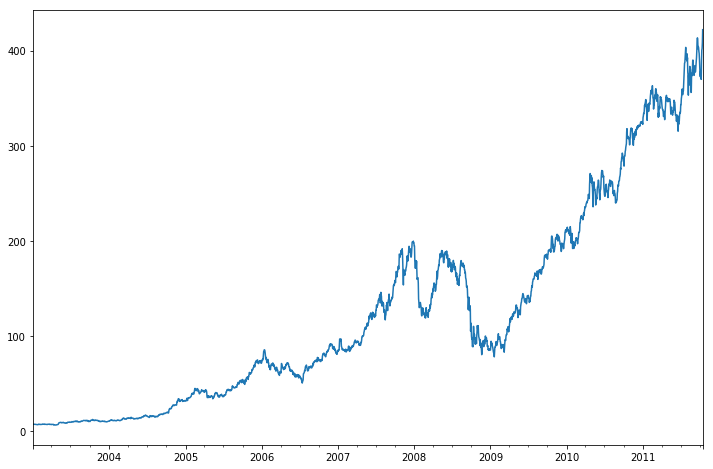

In [35]:
close_px['AAPL'].plot()

In [37]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


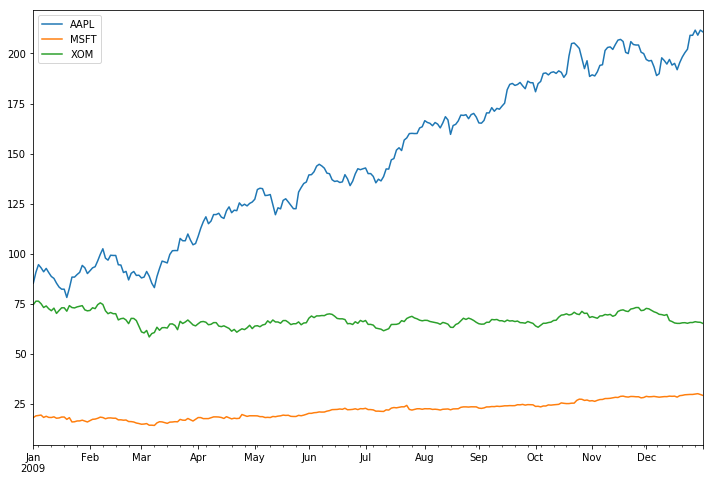

In [36]:
close_px.loc['2009'].plot()

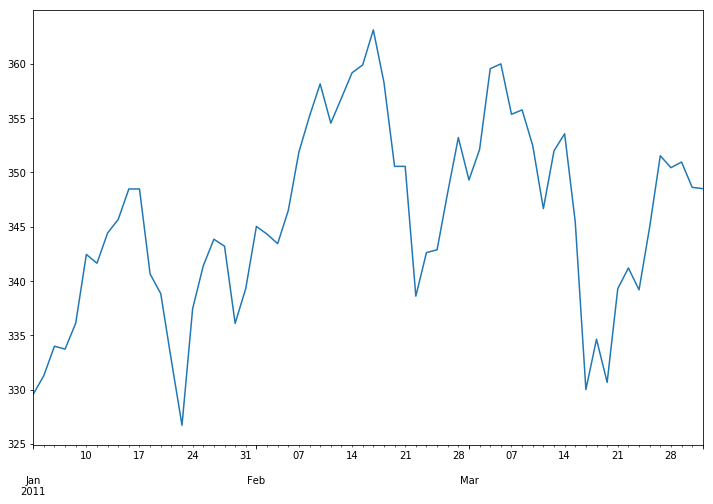

In [39]:
close_px['AAPL']['01-2011':'03-2011'].plot()

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.
C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


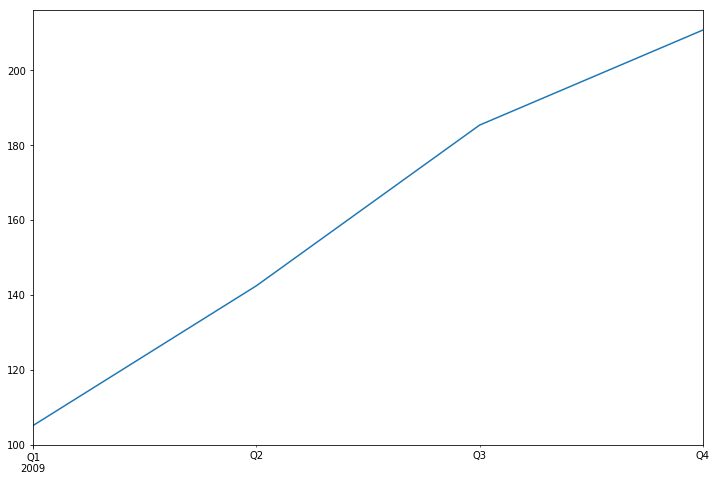

In [41]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q.ix['2009'].plot()

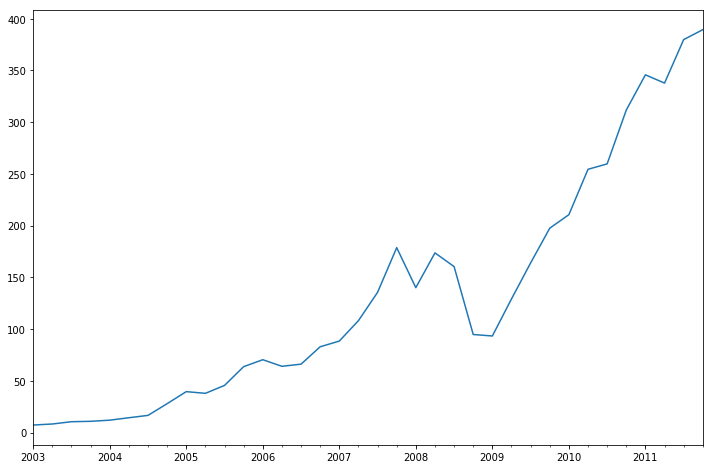

In [42]:
appl_q2 = close_px['AAPL'].resample('Q-DEC').mean()
appl_q2.plot()

## Moving window functions
- window 객체 이용
- min_period : 최소한의 관측 수
- window : int or offset
- closed : default == 'right'
- center : label을 표기하기 위함.
- win_type : 각 성분치의 가중치를 균등하게 주고 싶지 않을 때 사용. default : None
- on : rolling window를 통해 집계연산할 column을 지정하기 위함.
- 이미지 분석, 소리 분석 등을 하게 되면 win_type을 효과적으로 지정해야한다.

In [45]:
close_px = close_px.asfreq('B').fillna(method='ffill')

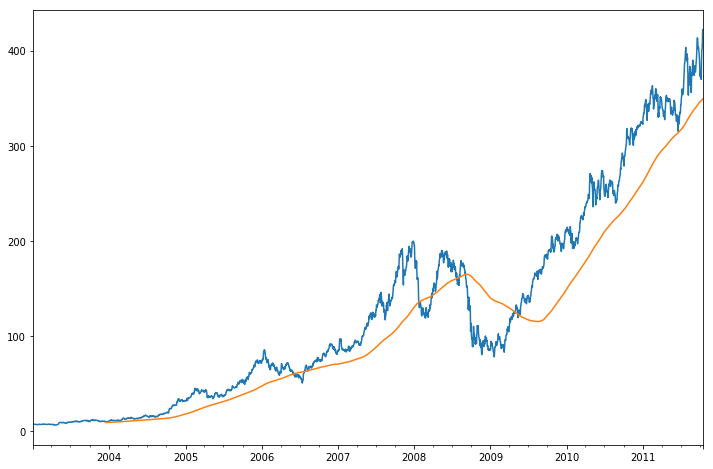

In [119]:
close_px.AAPL.plot()
close_px.AAPL.rolling(window = 250, min_periods=None).mean().plot() # window == 250이 1년의 business day.

- 2.7개월 후에 변화율을 보여줌.
- 이동평균식을 이용하면 과거 데이터와 비교해서 현재로만 판단하지 않게 만듦.

In [ ]:
plt.figure()

In [65]:
appl_std250 = close_px.AAPL.rolling(window = 250, center = False).std()
appl_std250[5:20]

2003-01-09   NaN
2003-01-10   NaN
2003-01-13   NaN
2003-01-14   NaN
2003-01-15   NaN
2003-01-16   NaN
              ..
2003-01-22   NaN
2003-01-23   NaN
2003-01-24   NaN
2003-01-27   NaN
2003-01-28   NaN
2003-01-29   NaN
Freq: B, Name: AAPL, Length: 15, dtype: float64

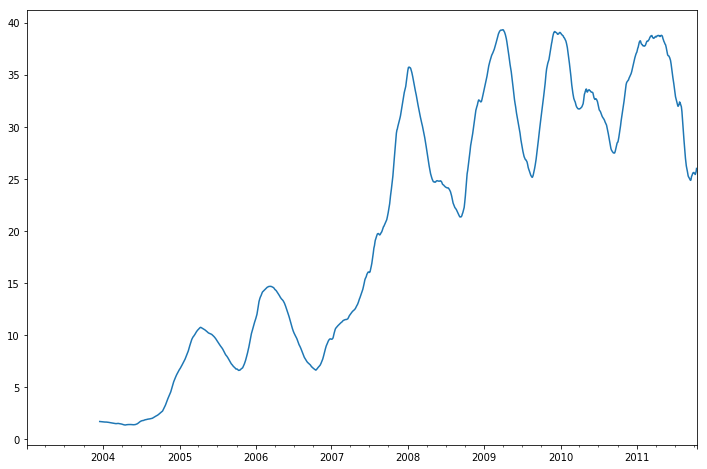

In [60]:
appl_std250.plot()

In [ ]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

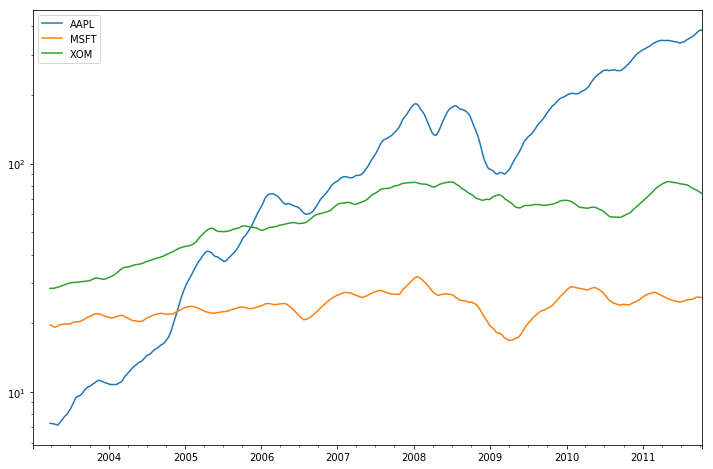

In [68]:
close_px.rolling(60).mean().plot(logy=True) # logy : True -> 데이터값 축소

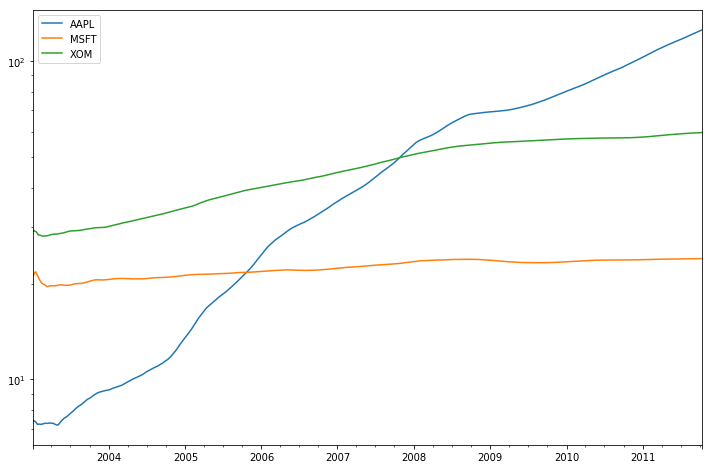

In [71]:
# 누적 평균 구하기
expanding2 = lambda x: x.rolling((len(x)), min_periods=1)

expanding2(close_px).mean().plot(logy=True)

In [72]:
plt.close('all')

### Exponentially-weighted functions (EWM)
- 시계열 연산은 일반적으로 moving window로 지수 가중 평균과 같은 통계함수를 수행한다.
- moving average
- (1-a)ma(t-1) + ax(t) : 학습 parameter를 초기화하고 업데이트
- 시간이 지나면 지날 수록 과거의 값은 희미해진다.
- a를 정하는 방법 : span, center of mass, half-life h(반감기), 직접 정의
    - span, com, halflife, alpha 옵션을 통해 지정 가능. But 4개 중 1개만 사용
- a의 값이 작아지면 과거의 값을 신경씀, 커지면 희미해짐
- adjust = True : 가중불균형을 해소하기 위해 처음 값에는 a를 곱하지 않음

Text(0.5, 1.0, 'Exponentially-weighted MA')

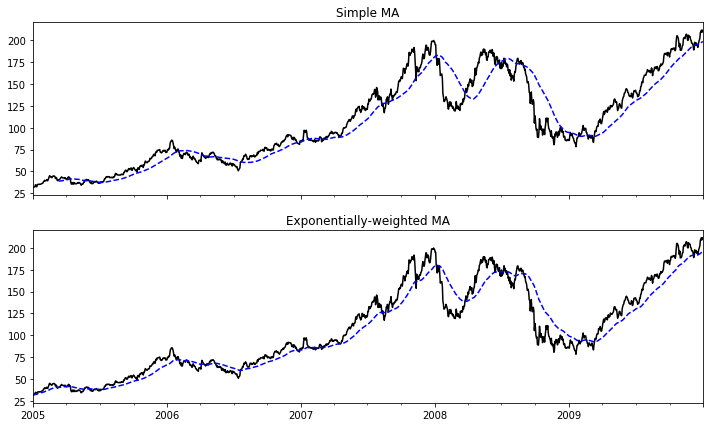

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']
spx_px close_px.SPX['2005':'2009']

ma60 = aapl_px.rolling(window = 60, min_periods=50).mean() # 첫 49개 값은 NaN이 됨. 최소 관측 수 50이므로
ewma60 = aapl_px.ewm(span=60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='b--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='b--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

- 모든 데이터에 대해서 지수순열을 전부 계산해야됨.
- 연산이 복잡해지고 속도가 느리므로 데이터가 굉장히 많다면 사용하지 않음.

### Binary moving window functions
- 상관관계와 공분산 같은 통계 연산은 2개의 시계열이 필요하다.
- corr는 X,Y의 데이터 사이즈가 같아야 한다. 즉, X가 가진 index에 맞춰서 Y의 index가 매칭된다.
- 따라서 spx_rets는 rolling하지 않았지만 corr 계산할 때, 기존의 값에 대한 형식(rolling)을 고려한다.

In [83]:
close_px
spx_px = close_px_all['SPX']

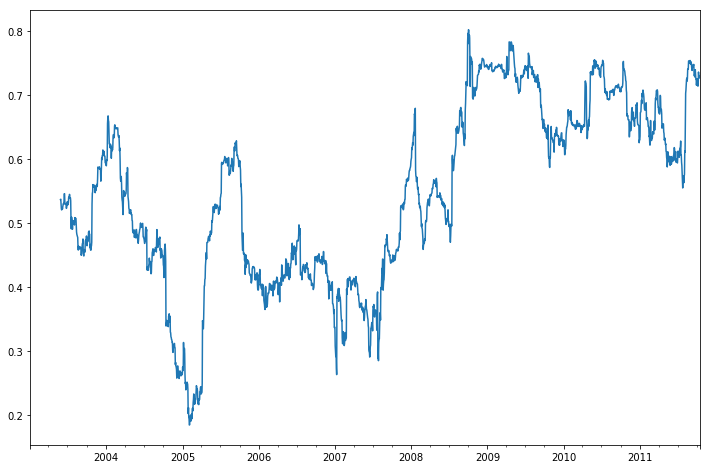

In [92]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

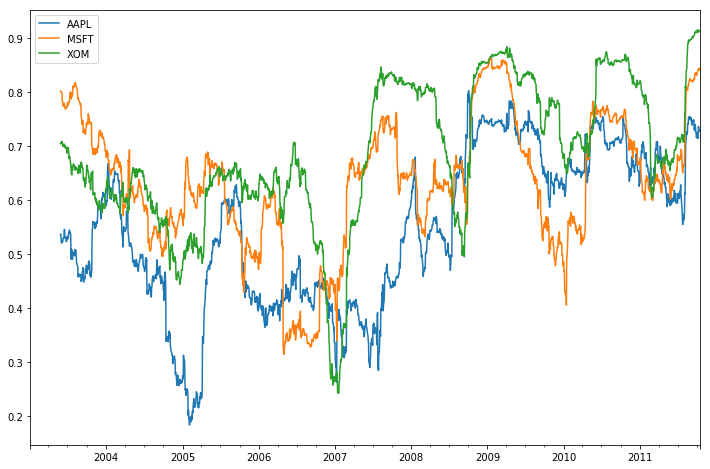

In [93]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [96]:
corr.mean()

AAPL    0.546410
MSFT    0.631176
XOM     0.684253
dtype: float64

- MSFT 주가가 전체에 미친 영향이 가장 높다

### User-defined moving window functions
- window 객체의 apply 함수는 사용자가 작성한 moving window 함수를 적용할 수 있도록 한다.

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


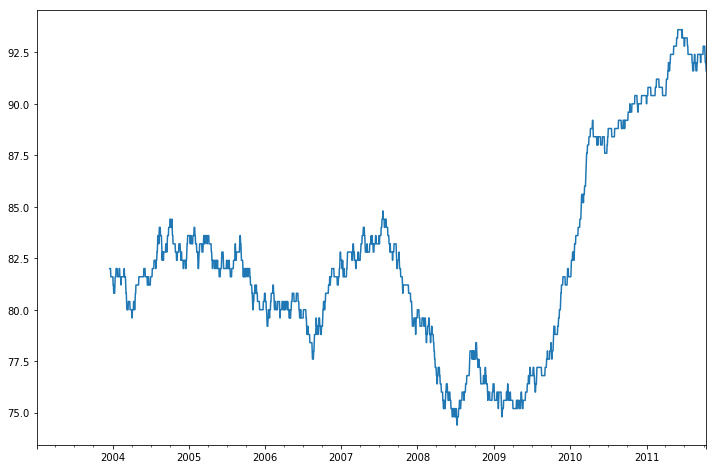

In [100]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
# 250일에서의 0.02 순위 == 대략 5번째 순위의 값.
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

#### Time Series transform

In [102]:
rng = pd.date_range('1/1/2000', periods=1100)
ts = Series(np.random.randn(0.2, 1, 1100), index=rng)
ts.head()

TypeError: 'float' object cannot be interpreted as an integer

In [103]:
zscore = lambda x: (x-x.mean) / x.std()

#### Performance and Memory Usage Notes

In [104]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts.head()

2000-01-01 00:00:00.000   -0.009559
2000-01-01 00:00:00.010   -0.587084
2000-01-01 00:00:00.020   -0.592723
2000-01-01 00:00:00.030    0.867726
2000-01-01 00:00:00.040   -0.316323
Freq: 10L, dtype: float64

In [110]:
ts.resample('15min').ohlc().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11112 entries, 2000-01-01 00:00:00 to 2000-04-25 17:45:00
Freq: 15T
Data columns (total 4 columns):
open     11112 non-null float64
high     11112 non-null float64
low      11112 non-null float64
close    11112 non-null float64
dtypes: float64(4)
memory usage: 434.1 KB


- 빠르당

In [111]:
%timeit ts.resample('15min').ohlc()

133 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [112]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s', how='ohlc')

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


213 ms ± 8.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
